### Model Training and Improvement

In [1]:
%matplotlib inline

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

from sklearn.linear_model import LinearRegression, RANSACRegressor, LogisticRegression
from sklearn.metrics import mean_squared_error, classification_report, RocCurveDisplay
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.pipeline import Pipeline # Pepe (|) - Composition of functions (in Linux)

In [3]:
income_data = pd.read_csv("data/adult.data", header=None)
income_data.columns = ["age", "workclass", "fnlwgt", "education", "education-num", 
                       "marital-statu", "occupation", "relationship", "race", "sex", 
                       "capital-gain", "capital-loss", "hours-per-week", "native-country", "income_class"]

In [4]:
income_data

,age,workclass,fnlwgt,education,education-num,marital-statu,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
income_attributes = income_data.drop(columns = "income_class")
income_class = income_data.income_class

In [6]:
income_data.shape

(32561, 15)

In [7]:
income_attributes.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-statu     object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
dtype: object

In [8]:
income_attributes = pd.get_dummies(income_attributes,drop_first=True)
income_attributes.dtypes.unique()

array([dtype('int64'), dtype('uint8')], dtype=object)

In [9]:
scaler = MinMaxScaler()
income_attributes = scaler.fit_transform(income_attributes)

In [10]:
logistic_regression = LogisticRegression()
logistic_regression.fit(income_attributes,income_class)

C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
logistic_regression.score(income_attributes, income_class)

0.8522158410368232

In [12]:
for c in [1e-5, 0.01, 0.1, 1, 10, 1e3, 1e6, 1e9]:
    logistic_regression = LogisticRegression(C = c)
    logistic_regression.fit(income_attributes, income_class)
#   print(c, "->", logistic_regression.score(income_attributes, income_class))
#    print(set(logistic_regression.predict(income_attributes)))


C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/

In [13]:
income_class.value_counts() / len(income_class)

 <=50K    0.75919
 >50K     0.24081
Name: income_class, dtype: float64

# Model training process

In [14]:
income_dataset = pd.concat([
    pd.read_csv('data/adult.data', sep = ", ", engine = "python", header= None),
    pd.read_csv('data/adult.test', sep = ", ", engine = "python", skiprows = 1, header= None)
])

income_dataset.columns = ["age", "workclass", "fnlwgt", "education", "education-num", 
                       "marital-statu", "occupation", "relationship", "race", "sex", 
                       "capital-gain", "capital-loss", "hours-per-week", "native-country", "income_class"]

In [15]:
income_dataset.income_class = income_dataset.income_class.replace({">50K.": ">50K", "<=50K.": "<=50K"})

In [16]:
income_attributes = income_dataset.drop(columns = "income_class")
income_classеs = income_dataset.income_class

In [17]:
income_attributes = pd.get_dummies(income_attributes) 
scaler = MinMaxScaler()
income_attributes = scaler.fit_transform(income_attributes)

In [18]:
income_attributes.shape

(48842, 108)

In [19]:
income_attributes_train, income_attributes_test, income_classеs_train, income_classеs_test = train_test_split(
        income_attributes, income_classеs, train_size= 0.8, test_size= 0.2,random_state= 42, stratify= income_classеs)

In [20]:
# stratify -> super important for unbalanced data

In [21]:
income_attributes_train.shape, income_attributes_test.shape, income_classеs_train.shape, income_classеs_test.shape

((39073, 108), (9769, 108), (39073,), (9769,))

In [22]:
logistic_regression = LogisticRegression()
logistic_regression.fit(income_attributes_train, income_classеs_train)

C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
logistic_regression.score(income_attributes_train, income_classеs_train)

0.8521741355923528

In [24]:
logistic_regression.score(income_attributes_test, income_classеs_test)

0.8509571092230526

In [25]:
income_classеs_train.value_counts() / len(income_classеs_train)

<=50K    0.76073
>50K     0.23927
Name: income_class, dtype: float64

In [26]:
income_classеs_test.value_counts() / len(income_classеs_test)

<=50K    0.760672
>50K     0.239328
Name: income_class, dtype: float64

In [27]:
print(classification_report(income_classеs_test, logistic_regression.predict(income_attributes_test)))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      7431
        >50K       0.73      0.59      0.66      2338

    accuracy                           0.85      9769
   macro avg       0.81      0.76      0.78      9769
weighted avg       0.84      0.85      0.85      9769



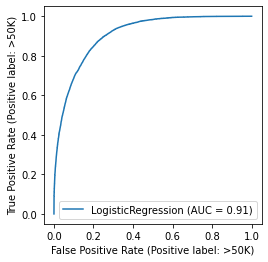

In [45]:
RocCurveDisplay.from_estimator(logistic_regression, income_attributes_train, income_classеs_train, pos_label=">50K")
plt.gca().set_aspect("equal")

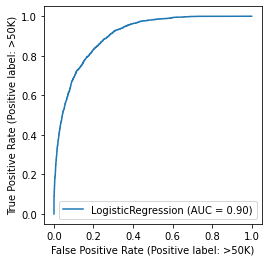

In [46]:
RocCurveDisplay.from_estimator(logistic_regression, income_attributes_test, income_classеs_test, pos_label=">50K")
plt.gca().set_aspect("equal")

In [56]:
grid_search = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid = {
        "C":[0.01, 100],
        "fit_intercept": [True, False],
        "max_iter": [10, 100]
    },
    scoring = 'f1'
)

In [57]:
grid_search.fit(income_attributes_train, income_classеs_train)

C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Gaming PC\AppData\Local\Packages

C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Gaming PC\AppData\Local\Packages

C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_scorer.py", li

C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_scorer.py", li

C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_scorer.py", li

C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Gaming PC\AppData\Local\Packages

C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Gaming PC\AppData\Local\Packages

C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Gaming PC\AppData\Local\Packages

C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Gaming PC\AppData\Local\Packages

C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Gaming PC\AppData\Local\Packages

C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Gaming PC\AppData\Local\Packages

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 100], 'fit_intercept': [True, False],
                         'max_iter': [10, 100]},
             scoring='f1')

In [58]:
grid_search.best_estimator_

LogisticRegression(C=0.01, max_iter=10)

In [59]:
grid_search.best_estimator_.score

<bound method ClassifierMixin.score of LogisticRegression(C=0.01, max_iter=10)>

In [60]:
grid_search.cv_results_

{'mean_fit_time': array([0.1335166 , 0.26530795, 0.13439903, 0.22320108, 0.13440218,
        0.59740281, 0.13340306, 0.58900428]),
 'std_fit_time': array([0.00126093, 0.01563193, 0.00149619, 0.00743973, 0.00135377,
        0.01741812, 0.00135634, 0.01837465]),
 'mean_score_time': array([0.03400321, 0.03459578, 0.03499856, 0.0349987 , 0.03419709,
        0.03399544, 0.03379464, 0.03479495]),
 'std_score_time': array([6.25712896e-04, 4.87015838e-04, 1.09758690e-03, 6.32264251e-04,
        4.02347073e-04, 4.77885049e-06, 3.99241432e-04, 3.99072952e-04]),
 'param_C': masked_array(data=[0.01, 0.01, 0.01, 0.01, 100, 100, 100, 100],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_fit_intercept': masked_array(data=[True, True, False, False, True, True, False, False],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_

In [ ]:
random_search = RandomizedSearchCV(
    estimator=LogisticRegression(),
    param_distributions = {
        "C":[0.01 ,0.1 ,1 ,10 ,100],
        "fit_intercept": [True, False],
        "max_iter": [10, 100]
    },
    n_iter = 5
)